<a href="https://colab.research.google.com/github/lucapqg/Statistic/blob/main/monte_carlo_mercado_financeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas-datareader==0.10.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 5.3 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [ ]:
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
import pandas as pd
import datetime as dt
plt.style.use('ggplot')

In [ ]:
ticker = 'MSFT'
start = dt.datetime(2011, 1, 1)
end = dt.datetime(2021, 1, 24)
stock_data = web.DataReader(ticker, 'yahoo', start=start, end=end)

stock_data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2011-01-03,28.18,27.920000,28.049999,27.98,53443800.0,21.917933
2011-01-04,28.17,27.850000,27.940001,28.09,54405600.0,22.004093
2011-01-05,28.01,27.770000,27.900000,28.00,58998700.0,21.933596
2011-01-06,28.85,27.860001,28.040001,28.82,88026300.0,22.575935
2011-01-07,28.74,28.250000,28.639999,28.60,73762000.0,22.403599


In [ ]:
returns = stock_data['Adj Close'].pct_change()
daily_vol = returns.std()

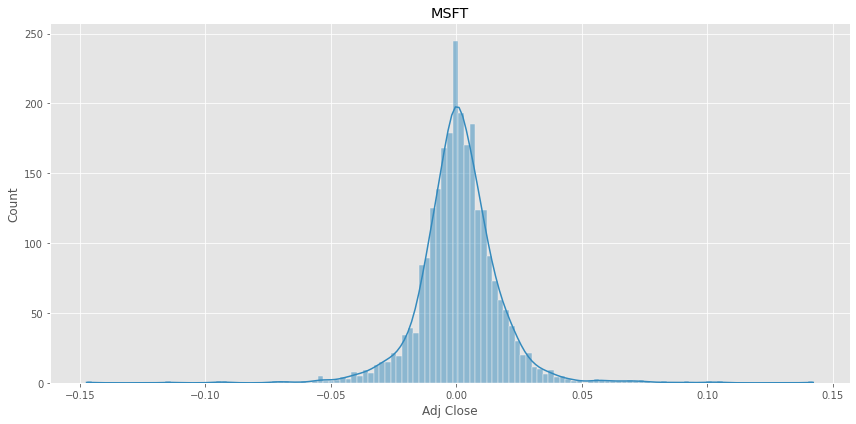

In [ ]:
fig,ax = plt.subplots(figsize=(12,6))
ax = sns.histplot(returns,kde=True)
ax.set_title(ticker)
fig.tight_layout()

In [ ]:
def monte_carlo(n_simulations,n_samples,std,val_ini):
  mc = pd.DataFrame()
  last_simulations = list()
  for s in range(n_simulations):
    list_simulations = list()
    list_simulations.append(val_ini * (1 + np.random.normal(0,std)))
    for i in range(n_samples):
      list_simulations.append(list_simulations[i] * (1 + np.random.normal(0,std)))   
    mc = pd.concat([mc,pd.DataFrame({s:list_simulations})],axis=1)   
    last_simulations.append(list_simulations[-1])

  return mc,last_simulations

In [ ]:
last_price = stock_data['Adj Close'][-1]
df,lasts = monte_carlo(n_simulations = 1000,
                       n_samples = 251,
                       std = daily_vol,
                       val_ini = last_price)

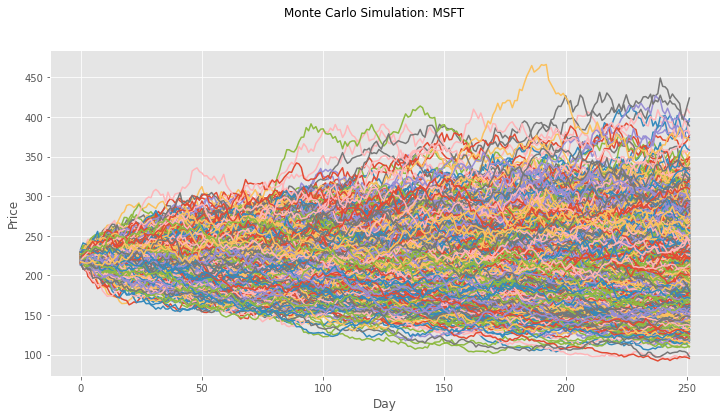

In [ ]:
fig = plt.figure(figsize=(12,6))
fig.suptitle(f"Monte Carlo Simulation: {ticker}")
plt.plot(df)
plt.xlabel('Day')
plt.ylabel('Price')
plt.show()

In [ ]:
print("Expected price: ", round(np.mean(lasts),2))
print("Quantile (5%): ",np.percentile(lasts,5))
print("Quantile (95%): ",np.percentile(lasts,95))

Expected price:  219.91
Quantile (5%):  137.96037367514006
Quantile (95%):  319.56673877458485


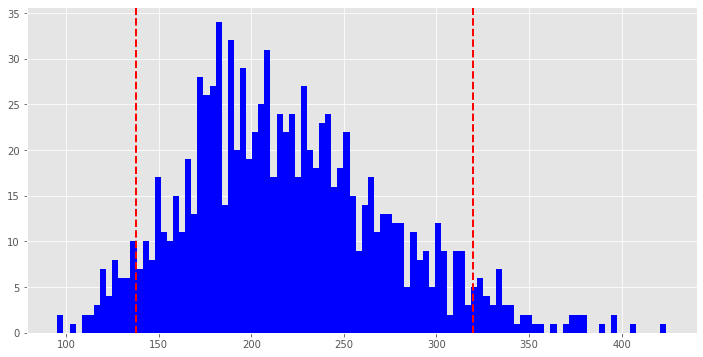

In [ ]:
fig,ax = plt.subplots(figsize=(12,6))
ax.hist(lasts,bins=100,color='blue')
ax.axvline(np.percentile(lasts,5), color='r', linestyle='dashed', linewidth=2)
ax.axvline(np.percentile(lasts,95), color='r', linestyle='dashed', linewidth=2)
fig.show()